In [78]:
# Import modules
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import modules for machine learning
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score

In [79]:
# TASK 1
# Load the data
df = pd.read_csv('data/winequality-red.csv', sep=';')

# Display the first rows
df.head()

# Display summary
df.info()

# Display summary statistics
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


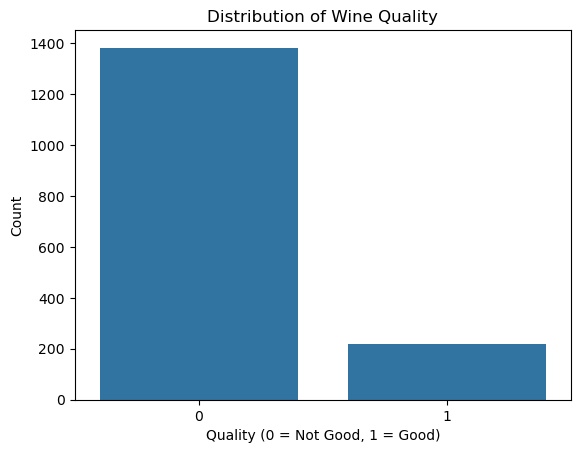

In [80]:
#TASK 2
# Convert the quality column to binary
df['quality_binary'] = np.where(df['quality'] >= 7, 1, 0)

# Check for missing values
df.isnull().sum()

# Plot the distribution of the quality column
sns.countplot(x='quality_binary', data=df)
plt.title('Distribution of Wine Quality')
plt.xlabel('Quality (0 = Not Good, 1 = Good)')
plt.ylabel('Count')
plt.show()

In [81]:
# TASK 3 Feauture Scaling

# separate the features and target variable
X = df.drop(['quality', 'quality_binary'], axis=1)
y = df['quality_binary']

# Before scaling
X.describe()

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Compare data before and after scaling
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
print("Before Scaling:\n", X['pH'].head(5))
print("After Scaling:\n", X_scaled_df['pH'].head(5))

Before Scaling:
 0    3.51
1    3.20
2    3.26
3    3.16
4    3.51
Name: pH, dtype: float64
After Scaling:
 0    1.288643
1   -0.719933
2   -0.331177
3   -0.979104
4    1.288643
Name: pH, dtype: float64


In [82]:
#TASK 4 Split the data
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


In [83]:
#TASK 5 apply KNN classifier

# initialize KNN classifier
knn = KNeighborsClassifier()

# cross validation
# define parameter grid
param_grid = {'n_neighbors': np.arange(1, 31)}

# use GridSearchCV to find the optimal K
knn_gscv = GridSearchCV(knn, param_grid, cv=5)
knn_gscv.fit(X_train, y_train)

# get the optimal K
optimal_k = knn_gscv.best_params_['n_neighbors']
print(f"Optimal K: {optimal_k}")

# train the model with the optimal K
knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k)
knn_optimal.fit(X_train, y_train)

# make predictions on the test set
y_pred = knn_optimal.predict(X_test)

# evaluate the model
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(cm)



Optimal K: 4
Accuracy: 0.88125
Confusion Matrix:
[[398  15]
 [ 42  25]]


In [84]:
# TASK 6 apply SVM classifier

# initialize SVM classifier
svm_linear = SVC(kernel='linear')
svm_rbf = SVC(kernel='rbf')

# train the models
svm_linear.fit(X_train, y_train)
svm_rbf.fit(X_train, y_train)

# make predictions on the test set
y_pred_linear = svm_linear.predict(X_test)
y_pred_rbf = svm_rbf.predict(X_test)

# print
print("SVM with Linear Kernel:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_linear):.4f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_linear))

# evaluate the models
accuracy_linear = accuracy_score(y_test, y_pred_linear)
cm_linear = confusion_matrix(y_test, y_pred_linear)

accuracy_rbf = accuracy_score(y_test, y_pred_rbf)
cm_rbf = confusion_matrix(y_test, y_pred_rbf)

print(f"Linear Kernel - Accuracy: {accuracy_linear}")
print("Linear Kernel - Confusion Matrix:")
print(cm_linear)

print(f"RBF Kernel - Accuracy: {accuracy_rbf}")
print("RBF Kernel - Confusion Matrix:")
print(cm_rbf)


SVM with Linear Kernel:
Accuracy: 0.8604
Confusion Matrix:
[[413   0]
 [ 67   0]]
Linear Kernel - Accuracy: 0.8604166666666667
Linear Kernel - Confusion Matrix:
[[413   0]
 [ 67   0]]
RBF Kernel - Accuracy: 0.8833333333333333
RBF Kernel - Confusion Matrix:
[[403  10]
 [ 46  21]]


In [85]:
# TASK 7 Compare the performance of the differet calssifiers and general reflection

# Summary table of accuracy scores
summary = {
  'Classifier': ['KNN', 'SVM (Linear Kernel)', 'SVM (RBF Kernel)'],
  'Accuracy': [accuracy, accuracy_linear, accuracy_rbf]
}
summary_df = pd.DataFrame(summary)
print(summary_df)

            Classifier  Accuracy
0                  KNN  0.881250
1  SVM (Linear Kernel)  0.860417
2     SVM (RBF Kernel)  0.883333


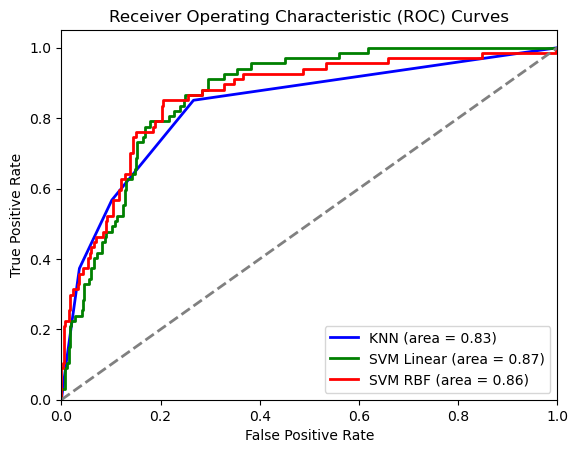

In [86]:
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and ROC area for each classifier
fpr_knn, tpr_knn, _ = roc_curve(y_test, knn_optimal.predict_proba(X_test)[:,1])
roc_auc_knn = auc(fpr_knn, tpr_knn)

fpr_svm_linear, tpr_svm_linear, _ = roc_curve(y_test, svm_linear.decision_function(X_test))
roc_auc_svm_linear = auc(fpr_svm_linear, tpr_svm_linear)

fpr_svm_rbf, tpr_svm_rbf, _ = roc_curve(y_test, svm_rbf.decision_function(X_test))
roc_auc_svm_rbf = auc(fpr_svm_rbf, tpr_svm_rbf)

# Plot ROC curves
plt.figure()
plt.plot(fpr_knn, tpr_knn, color='blue', lw=2, label='KNN (area = %0.2f)' % roc_auc_knn)
plt.plot(fpr_svm_linear, tpr_svm_linear, color='green', lw=2, label='SVM Linear (area = %0.2f)' % roc_auc_svm_linear)
plt.plot(fpr_svm_rbf, tpr_svm_rbf, color='red', lw=2, label='SVM RBF (area = %0.2f)' % roc_auc_svm_rbf)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc="lower right")
plt.show()

Reflection
1. Which classifier performed the best based on accuracy?

SVM with RBF-kernel performed best based on accuracy, with the score 88.33%

2. Considering both accuracy and confusion matrices, which model would you choose and why?

I would choose SVM with RBF kernel. It has higher accuracy (88.33%) and can classify both 'good' and 'not good' wines, unlike the linear SVM, which only predicts one class. 

3. Could you use the models trained on red wine to predict the quality if the different white wines?

No, the models trained on red wine likely won't perform well on white wine due to the differences in their chemical properties. A separate model should be trained on white wine data

4. Reflect on how you might apply the techniques learned in this lab to other datasets and machine learning problems.

The techniques from this lab, like data preprocessing, model selection (KNN, SVM), and hyperparameter tuning, can be applied to various datasets in classification tasks across different domains


